In [2]:
conda install pymongo

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
yelp_db = client['yelp']
reviews_table = yelp_db['reviews']

In [5]:
import json
with open('yelp_dataset/review.json', 'r') as f:
    for line in f:
        review = json.loads(line)
        reviews_table.insert(review)

/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """


In [6]:
cur = reviews_table.find().limit(10)
for r in cur:
    print(r)

{'_id': ObjectId('5e064d55639ab4c519e59b5c'), 'review_id': 'Q1sbwvVQXV2734tPgoKj4Q', 'user_id': 'hG7b0MtEbXx5QzbzE6C_VA', 'business_id': 'ujmEBvifdJM6h6RLv4wQIg', 'stars': 1.0, 'useful': 6, 'funny': 1, 'cool': 0, 'text': 'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.', 'date': '2013-05-07 04:34:36'}
{'_id': ObjectId('5e064d55639ab4c519e59b5d'), 'review_id': 'GJXCdrto3ASJOqKeVWPi6Q', 'user_id': 'yXQM5uF2jS6es16SJzNHfg', 'business_id': 'NZnhc2sEQy3RmzKTZnqtwQ', 'stars': 5.0, 'useful': 0, 'funny': 0, 'cool': 0, 'text': "I *adore* Travis at the Hard Rock's new Kelly Cardenas Salon!  I'm always a fan of a great blowout and no stranger to the chains that offer this service; however, Travis has taken the flawless blowout to a whole new level!  \n\nTravis's greets you with his perfectly green swoosh in his otherwise perfectly styled blac

In [7]:
business_table = yelp_db['business']
with open('yelp_dataset/business.json', 'r') as f:
    for line in f:
        business = json.loads(line)
        business_table.insert(business)

/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """


In [8]:
checkin_table = yelp_db['checkin']
with open('yelp_dataset/checkin.json', 'r') as f:
    for line in f:
        checkin = json.loads(line)
        checkin_table.insert(checkin)

/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """


In [9]:
tip_table = yelp_db['tip']
with open('yelp_dataset/tip.json', 'r') as f:
    for line in f:
        tip = json.loads(line)
        tip_table.insert(tip)

/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """


In [10]:
user_table = yelp_db['user']
with open('yelp_dataset/user.json', 'r') as f:
    for line in f:
        user = json.loads(line)
        user_table.insert(user)

/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """


In [11]:
import pandas as pd

review_df = pd.DataFrame(list(reviews_table.find()))
business_df = pd.DataFrame(list(business_table.find()))
checkin_df = pd.DataFrame(list(checkin_table.find()))
tip_df = pd.DataFrame(list(tip_table.find()))
user_df = pd.DataFrame(list(user_table.find()))

In [60]:
ca = business_df[business_df['state'] == 'CA']
ca

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
19062,5e0667ef639ab4c5194bea9e,YMeWjOd1svHDGdDCKoiGgg,Electric Daisy Carnival,7000 N Las Vegas Blvd,Los Angeles,CA,90037,36.273260,-115.009430,4.5,36,0,"{'OutdoorSeating': 'True', 'GoodForKids': 'Fal...","Local Flavor, Festivals, Arts & Entertainment,...",None
20237,5e0667f0639ab4c5194bef35,x_vRaIuDsvvRK5tQpV9hoA,Pretty Girl Lingo,,Las Vegas,CA,89109,36.128561,-115.171130,5.0,4,1,"{'ByAppointmentOnly': 'True', 'HairSpecializes...","Hair Extensions, Makeup Artists, Hair Salons, ...","{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ..."
36681,5e066801639ab4c5194c2f71,dPlwOjYe6gFT-w85Qg6GeA,Atlantic Place Dental Office,111 N Atlantic Blvd,Monterey Park,CA,91754,36.125053,-115.163918,3.0,4,1,"{'ByAppointmentOnly': 'True', 'Ambience': '{'r...","Restaurants, General Dentistry, Dentists, Shop...",None
47208,5e06680c639ab4c5194c5890,t8xvlKk5axVYy2c2p70NRg,Makeup By Kassandra Franco,,Las Vegas Nv,CA,92703,36.169941,-115.139830,4.5,15,1,"{'BikeParking': 'True', 'ByAppointmentOnly': '...","Hair Extensions, Hair Stylists, Makeup Artists...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
54428,5e066814639ab4c5194c74c4,Lbq36N-MFtn9ozAYs1ZiCA,Couture Pawz,,Chandler,CA,85226,33.287221,-111.940325,4.5,8,0,None,"Pet Services, Pet Groomers, Pets",None
56948,5e066816639ab4c5194c7e9c,oBEFhUe7yEH1PK25bImCWA,Brooks Photography,"4372 West Point Loma Blvd, Ste A",San Diego,CA,92107,36.175000,-115.136389,1.5,35,1,{'BusinessAcceptsCreditCards': 'True'},"Session Photography, Event Photography, Event ...",None
57583,5e066817639ab4c5194c8117,SP_tfo1VdYlrXBG_6OMZdA,Tiffany's Braid Lounge,Rose Valley,Antioch,CA,94531,36.221598,-115.168253,2.5,11,1,"{'BusinessParking': '{'garage': False, 'street...","Hair Stylists, Beauty & Spas, Hair Extensions,...","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ..."
68639,5e066823639ab4c5194cac47,UfUddig0a3jDlIrz3Jg-JQ,Fireplace Door Guy,32200 Vista Del Monte,Temecula,CA,92591,33.495635,-111.925129,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Fireplace Services, Chimney Sweeps, Door Sales...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
68990,5e066823639ab4c5194cada6,meK9y7zRVoN4uaf6sAC8KQ,Finest-Edge Precision Sharpening Service,,Peninsula,CA,44264,41.241167,-81.552618,5.0,22,1,{'BusinessAcceptsCreditCards': 'True'},"Local Services, Knife Sharpening",None
78449,5e06682d639ab4c5194cd299,UE_fvET7Aj16w7Cluj7ZGg,Beachside Tans,21170 Beach Blvd,Huntington Beach,CA,85206,33.401362,-111.728268,5.0,10,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Beauty & Spas, Spray Tanning, Tanning","{'Tuesday': '10:0-17:0', 'Wednesday': '10:0-17..."


In [12]:
import numpy as np

business_df = business_df.dropna(subset=['categories'])
restaurant_df = business_df[business_df['categories'].str.contains('Restaurants')]
restaurant_df

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,5e0667da639ab4c5194ba02a,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
11,5e0667da639ab4c5194ba033,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
13,5e0667da639ab4c5194ba035,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
17,5e0667da639ab4c5194ba039,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192587,5e0668a3639ab4c5194e9073,oS0CnUbyv0GUoD3L8_3UPQ,Thai Fantasy,578 Yonge Street,Toronto,ON,M4Y 1Z3,43.665120,-79.384809,4.0,113,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...","Restaurants, Thai","{'Monday': '0:0-0:0', 'Tuesday': '11:0-23:0', ..."
192589,5e0668a3639ab4c5194e9075,ghovD5ZTGDQ5Q2U4ERddWw,Five Guys,3863 Medina Rd,Fairlawn,OH,44333,41.136561,-81.639712,4.0,22,1,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...","Burgers, Restaurants, Fast Food, American (New)","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
192595,5e0668a3639ab4c5194e907b,h3QErqS3OZgLJ5Tb6-sLyQ,Asia Hut,1450 Kingston Rd,Pickering,ON,L1V 1C1,43.841844,-79.083881,4.5,4,1,"{'BikeParking': 'True', 'RestaurantsAttire': '...","Restaurants, Soup, Chinese, Caribbean","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."
192596,5e0668a3639ab4c5194e907c,KnafX7T6qSAmSrLhd709vA,Pho Maisonneuve,948 Boulevard de Maisonneuve Est,Montréal,QC,H2L 1Z1,45.517430,-73.558873,4.0,25,1,"{'GoodForKids': 'True', 'WiFi': 'u'no'', 'Rest...","Vietnamese, Soup, Restaurants","{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'..."


In [61]:
ca = restaurant_df[restaurant_df['state'] == 'CA']
ca

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
36681,5e066801639ab4c5194c2f71,dPlwOjYe6gFT-w85Qg6GeA,Atlantic Place Dental Office,111 N Atlantic Blvd,Monterey Park,CA,91754,36.125053,-115.163918,3.0,4,1,"{'ByAppointmentOnly': 'True', 'Ambience': '{'r...","Restaurants, General Dentistry, Dentists, Shop...",None


In [13]:
business_review = pd.merge(restaurant_df, review_df, left_on='business_id', right_on='business_id')
business_review

,_id_x,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,...,hours,_id_y,review_id,user_id,stars_y,useful,funny,cool,text,date
0,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d5d639ab4c519e5bcfd,6W0MQHmasK0IsaoDo4bmkw,2K62MJ4CJ19L8Tp5pRfjfQ,3.0,3,2,0,My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30
1,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d65639ab4c519e5dec1,BeeBfUxvzD4qNX4HxrgA5g,A0kENtCCoVT3m7T35zb2Vg,3.0,0,0,0,We've always been there on a Sunday so we were...,2013-06-24 23:11:30
2,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d6a639ab4c519e5f6fc,A1D2kUnZ0HTroFreAheNSg,SuOLY03LW5ZcnynKhbTydA,3.0,0,0,0,"***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22
3,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d6b639ab4c519e5fbdc,2pf45Stf-pNew-xgTababQ,lymyUak6KNcNKoDbK87MiQ,1.0,1,0,0,"Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43
4,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d71639ab4c519e61308,RHhlmL07evgAdPaXQV8Omg,6vU0I5XgCv9OQHZ76rV6qw,4.0,2,1,2,One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4201679,5e0668a3639ab4c5194e9083,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ...",5e06648d639ab4c5194a2883,DGwxHd3N8kJNs9GRnxp09A,ZO8h27XOn_XFKLLRRrLp0g,5.0,2,1,0,When I write a review on someplace that I have...,2013-05-03 18:57:28
4201680,5e0668a3639ab4c5194e9083,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ...",5e066490639ab4c5194a385b,xpfvecUdqyTug6ahkWQ9SQ,mwual7bROpwhZ3fu_GiPtQ,5.0,1,0,0,We stopped in at Tre Belle on a Tuesday evenin...,2013-12-04 01:16:42
4201681,5e0668a3639ab4c5194e9083,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ...",5e0664d3639ab4c5194b5b72,5vt9FZre5dqksWzpj-8gCg,WKneD6tKr18q0ey0QbHBaA,3.0,1,0,0,I wasnt impressed. The place is beautiful and ...,2012-04-25 16:51:38
4201682,5e0668a3639ab4c5194e9083,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ...",5e0664e0639ab4c5194b95a5,gLKSsgs4t2XPvfg6wOPuEQ,PxB2oZXO9N_4Zo2VIPUuGA,1.0,1,0,0,Last night some friends and I dined at this es...,2018-02-22 22:32:44


In [174]:
most_reviews = restaurant_df.sort_values(by=['review_count'], ascending=False).head(50)
most_reviews.state.unique()

state = []

for s in most_reviews.state.unique():
    state.append(s)
    
state

['NV', 'AZ']

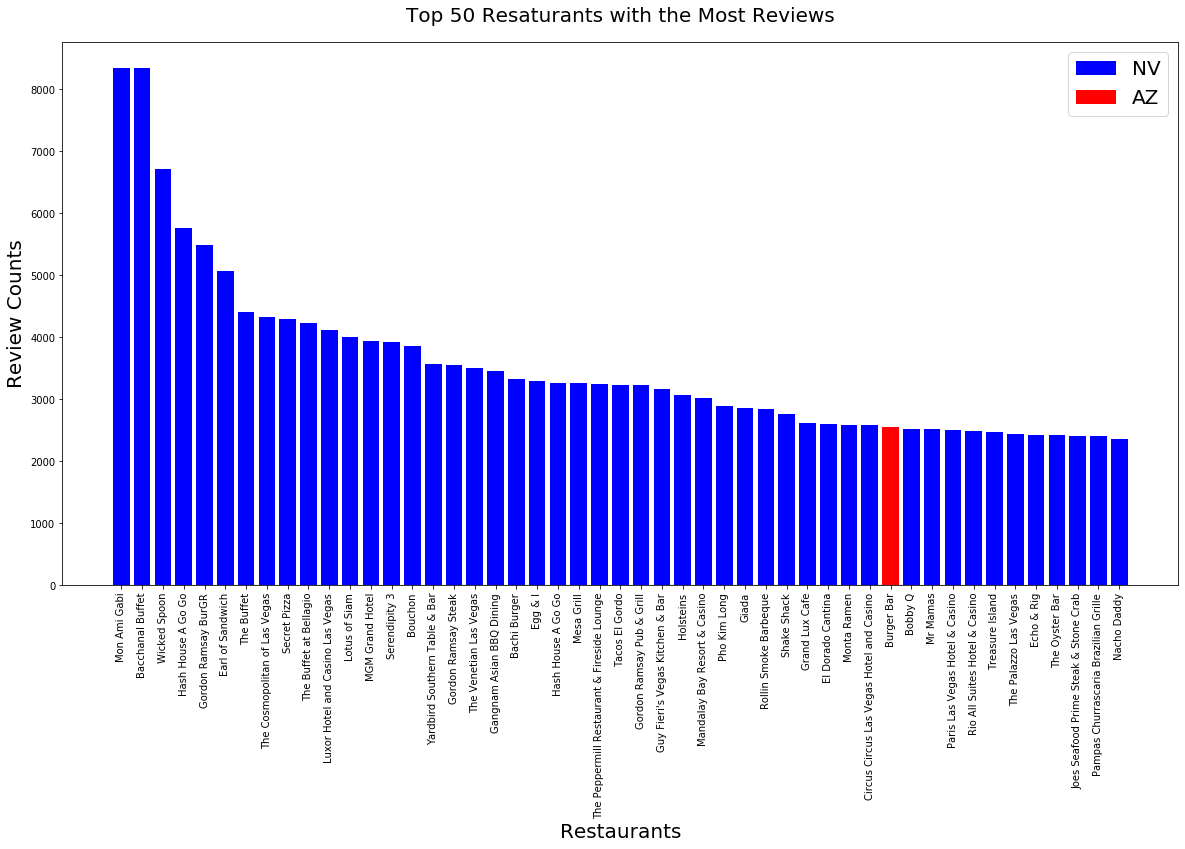

In [175]:
# colors = ['blue', 'green', 'red', 'brown', 'cyan', 'purple']
import matplotlib.pyplot as plt

az = most_reviews[most_reviews['state'] == 'AZ']

fig, ax = plt.subplots(figsize=[20,10])
ax.set_title('Top 50 Resaturants with the Most Reviews', fontsize=20, pad=20)
ax.bar(most_reviews['name'], most_reviews['review_count'], color= 'blue', label='NV')
ax.bar(az['name'], az['review_count'], color='red', label='AZ')
ax.set_xticklabels(most_reviews['name'], rotation=90)
ax.set_xlabel('Restaurants', fontsize=20)
ax.set_ylabel('Review Counts', fontsize=20)
plt.legend(fontsize=20)

plt.savefig('images/top_50_restaurants.png', bbox_inches = "tight")

In [151]:
most_reviews = restaurant_df.sort_values(by=['review_count'], ascending=False).head(100)
most_reviews.state.unique()

state = []

for s in most_reviews.state.unique():
    state.append(s)
    
state

['NV', 'AZ', 'QC', 'ON', 'PA', 'WI']

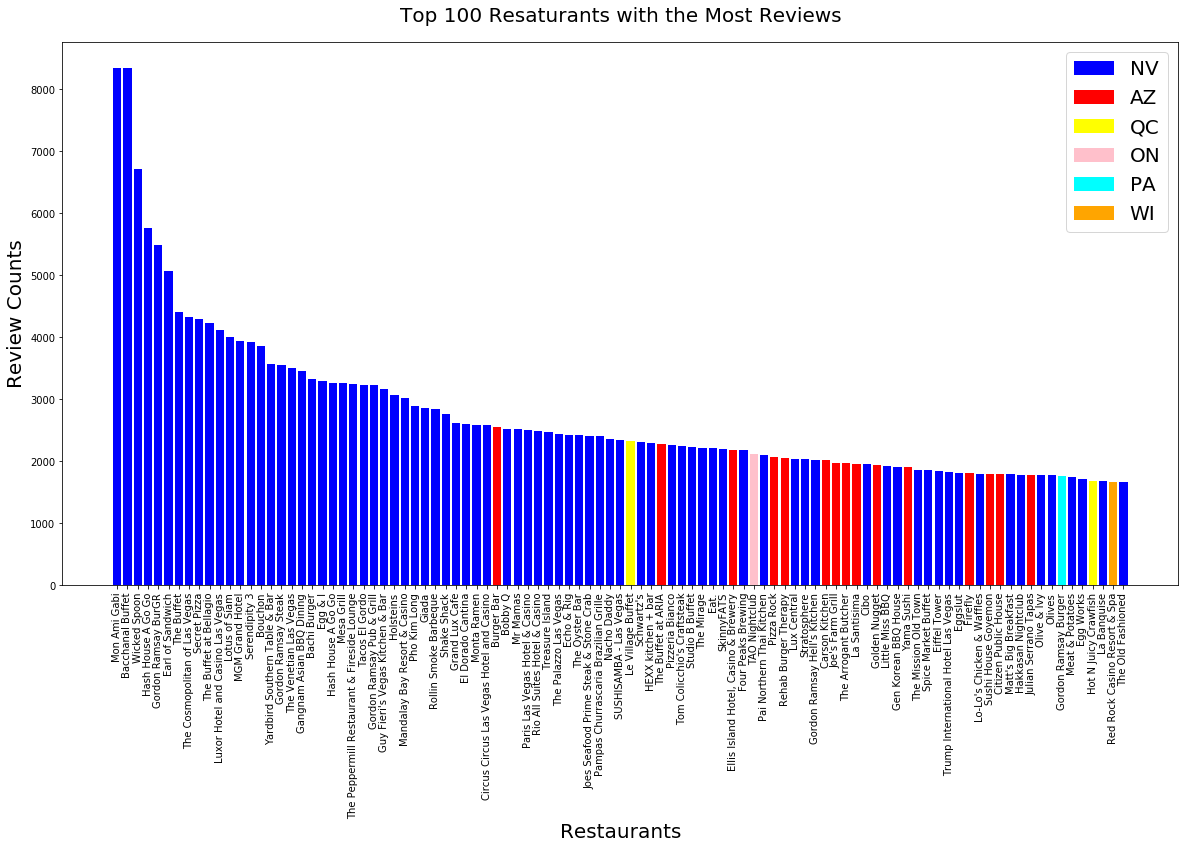

In [170]:
colors = ['blue', 'red', 'yellow', 'pink', 'cyan', 'orange']
import matplotlib.pyplot as plt

st = {}
for idx, s in enumerate(state):
    st[idx] = most_reviews[most_reviews['state'] == s]

fig, ax = plt.subplots(figsize=[20,10])
ax.set_title('Top 100 Resaturants with the Most Reviews', fontsize=20, pad=20)
ax.bar(most_reviews['name'], most_reviews['review_count'])
for idx, s in enumerate(state):
    ax.bar(st[idx]['name'], st[idx]['review_count'], color=colors[idx], label=s)
ax.set_xticklabels(most_reviews['name'], rotation=90)
ax.set_xlabel('Restaurants', fontsize=20)
ax.set_ylabel('Review Counts', fontsize=20)
plt.legend(fontsize=20)

plt.savefig('images/top_100_restaurants.png', bbox_inches = "tight")

In [28]:
states_review = business_review.groupby('state')
src = states_review.count()['review_id']
src

state
AB       64029
AL           3
AR           7
AZ     1191691
BC           3
CA           4
CON          3
FL          10
IL       28741
NC      272619
NE           8
NM          14
NV     1391673
NY          95
OH      227182
ON      574245
PA      204438
QC      137992
SC       14401
TX        1010
VA           9
VT           5
WA           3
WI       93488
XGM          3
XWY          8
Name: review_id, dtype: int64

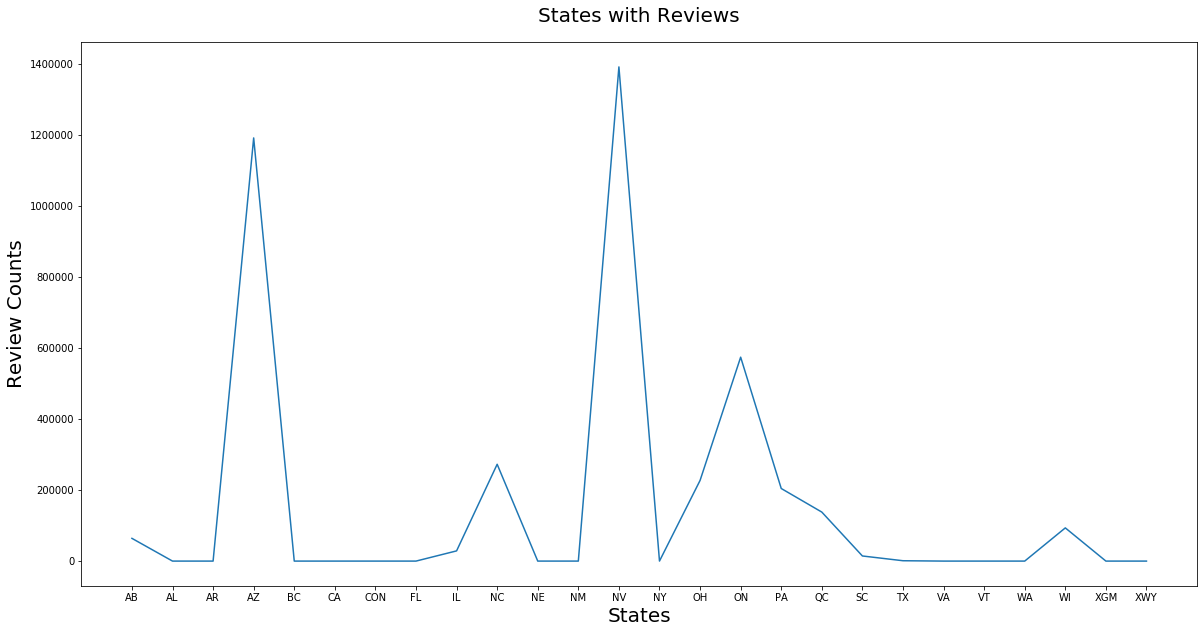

In [173]:
fig, ax = plt.subplots(figsize=[20, 10])

ax.set_title('States with Reviews', fontsize=20, pad=20)
ax.set_xlabel('States', fontsize=20)
ax.set_ylabel('Review Counts', fontsize=20)
ax.plot(src)

plt.savefig('images/states_with_reviews.png', bbox_inches = "tight")

In [31]:
st_re = src.sort_values(ascending=False)
st_re.head(7)

state
NV    1391673
AZ    1191691
ON     574245
NC     272619
OH     227182
PA     204438
QC     137992
Name: review_id, dtype: int64

In [25]:
business_review['date'] = business_review['date'].astype('datetime64[ns]') 
business_review

KeyboardInterrupt: 

In [27]:
review_year = pd.DataFrame({"city": business_review['city'], "state": business_review['state'], 'year': business_review['date'].dt.year})
review_year

,city,state,year
0,Mississauga,ON,2017
1,Mississauga,ON,2013
2,Mississauga,ON,2016
3,Mississauga,ON,2014
4,Mississauga,ON,2011
...,...,...,...
4201679,Bath,OH,2013
4201680,Bath,OH,2013
4201681,Bath,OH,2012
4201682,Bath,OH,2018


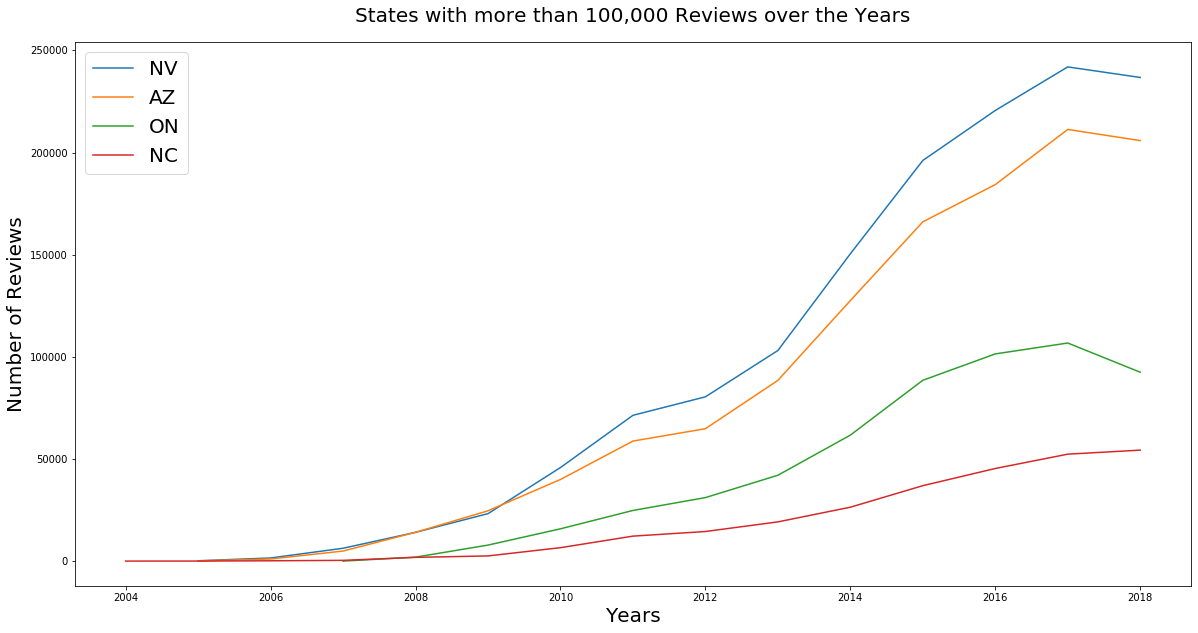

<Figure size 432x288 with 0 Axes>

In [66]:
# a = review_year[review_year['state'] == 'NV']
# a.groupby('year').count().reset_index()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[20, 10])

ax.set_title('States with more than 100,000 Reviews over the Years', fontsize=20, pad=20)
ax.set_xlabel('Years', fontsize=20)
ax.set_ylabel('Number of Reviews', fontsize=20)

for k, v in st_re.head(4).items():
    year_count = review_year[review_year['state'] == k]
    graph_year = year_count.groupby('year').count().reset_index()
    ax.plot(graph_year['year'], graph_year['state'], label=k)

plt.legend(fontsize=20)
plt.show()

plt.savefig('images/states_years.png')

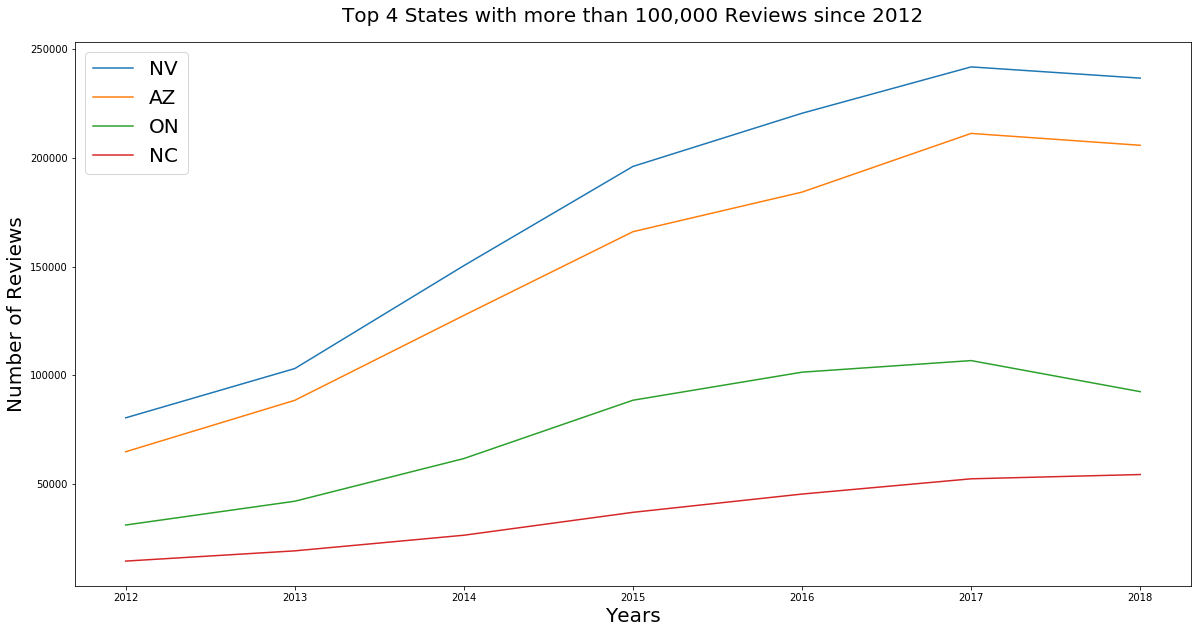

In [62]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[20, 10])

year2012 = review_year[review_year['year'] >= 2012]

ax.set_title('Top 4 States with more than 100,000 Reviews since 2012', fontsize=20, pad=20)
ax.set_xlabel('Years', fontsize=20)
ax.set_ylabel('Number of Reviews', fontsize=20)

for k, v in st_re.head(4).items():
    year_count = year2012[year2012['state'] == k]
    graph_year = year_count.groupby('year').count().reset_index()
    ax.plot(graph_year['year'], graph_year['state'], label=k)

plt.legend(fontsize=20)
plt.show()

plt.

In [65]:
review_stars = business_review.groupby(['name', 'city', 'state'])
review_stars = review_stars.mean().reset_index()
review_stars

,name,city,state,latitude,longitude,stars_x,review_count,is_open,stars_y,useful,funny,cool
0,#1 Fried Rice,Tolleson,AZ,33.450580,-112.260313,3.50000,44.000000,0.0,3.391304,1.086957,0.434783,0.543478
1,#1 Hawaiian Barbecue,Las Vegas,NV,36.067823,-115.164626,3.68254,33.793651,1.0,3.619048,1.047619,0.761905,0.714286
2,#1 Pho,Middleburg Heights,OH,41.351727,-81.785527,3.50000,8.000000,0.0,3.625000,0.875000,0.250000,0.500000
3,#1 Sushi,Phoenix,AZ,33.575127,-112.120880,4.00000,64.000000,1.0,4.184615,0.923077,0.323077,0.430769
4,#1Brothers Pizza,Surprise,AZ,33.623660,-112.424707,3.00000,67.000000,1.0,3.086957,0.347826,0.144928,0.101449
...,...,...,...,...,...,...,...,...,...,...,...,...
49927,Ôzeu & O'Boeuf,Montréal,QC,45.475563,-73.586488,3.50000,22.000000,0.0,3.565217,1.173913,0.260870,0.521739
49928,Überrito,Phoenix,AZ,33.583617,-111.976137,4.00000,126.000000,0.0,3.968992,0.914729,0.310078,0.480620
49929,é by José Andrés,Las Vegas,NV,36.109946,-115.175391,4.50000,346.000000,1.0,4.438257,5.092010,2.552058,3.290557
49930,Œuf et Bœuf,Montréal,QC,45.549220,-73.574185,3.50000,26.000000,0.0,3.538462,0.615385,0.038462,0.230769
